In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry.point import Point

import contextily as ctx

import sys
sys.path.append('..')
from utils import merge_on_lat_lon

In [2]:
df_geo = gpd.read_file('../countries/MWI/grid/grid.shp')

In [3]:
df_geo

,GID_0,NAME_0,population,geometry
0,MWI,Malawi,1831.335327,"POLYGON ((32.75442 -13.55145, 32.75442 -13.582..."
1,MWI,Malawi,6417.386719,"POLYGON ((32.67429 -13.58251, 32.75442 -13.582..."
2,MWI,Malawi,309.328827,"POLYGON ((32.84425 -13.45090, 32.84425 -13.495..."
3,MWI,Malawi,4713.566895,"POLYGON ((32.83539 -13.49517, 32.84425 -13.495..."
4,MWI,Malawi,2767.572754,"POLYGON ((32.75442 -13.58251, 32.84425 -13.582..."
...,...,...,...,...
1442,MWI,Malawi,10320.574219,"POLYGON ((35.80869 -15.84139, 35.83018 -15.841..."
1443,MWI,Malawi,4459.725586,"POLYGON ((35.80869 -15.92779, 35.82366 -15.927..."
1444,MWI,Malawi,1659.532715,"POLYGON ((35.80869 -16.01415, 35.82730 -16.014..."
1445,MWI,Malawi,45.102989,"POLYGON ((35.92031 -14.88857, 35.89852 -14.888..."


In [4]:
lsms = pd.read_csv('../data/LSMS/MWI/processed/cluster_data.csv')

In [5]:
lsms

,cluster_lat,cluster_lon,cluster_persons_surveyed,cluster_annual_consumption_pc,cluster_annual_phone_consumption_pc,cluster_cellphones_pc,cluster_estimated_annual_phone_cost_pc,cluster_nightlights
0,-17.095150,35.217213,79,961.328026,47.627469,0.177215,428.481013,0.000000
1,-17.092351,35.114643,70,855.258482,3.189638,0.028571,32.571429,0.000000
2,-17.016698,35.079629,78,1058.343450,1.978659,0.025641,19.230769,0.000000
3,-16.977243,35.205706,66,1127.493134,8.631155,0.045455,83.333333,0.121212
4,-16.956385,35.168967,61,736.167585,5.081308,0.065574,49.180328,0.502674
...,...,...,...,...,...,...,...,...
775,-9.591378,33.057450,62,952.339970,1.452034,0.016129,16.129032,0.000000
776,-9.550397,33.291558,59,839.451073,24.716671,0.050847,277.966102,0.000000
777,-9.519230,33.139193,72,1218.595595,35.439080,0.166667,350.000000,0.000000
778,-9.507538,33.259649,63,1210.222098,27.476154,0.158730,266.666667,0.000000


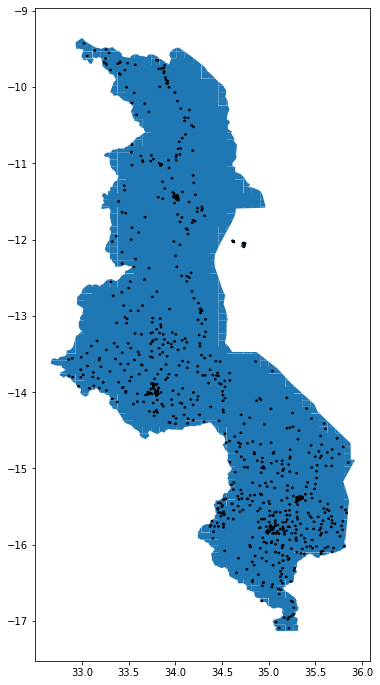

In [6]:
fig, ax = plt.subplots(figsize=(6,12))
for _, r in lsms.iterrows():
    c = plt.Circle((r.cluster_lon,r.cluster_lat), radius=0.01, color='black')
    ax.add_artist(c)
gpd.plotting.plot_polygon_collection(ax, df_geo['geometry'])

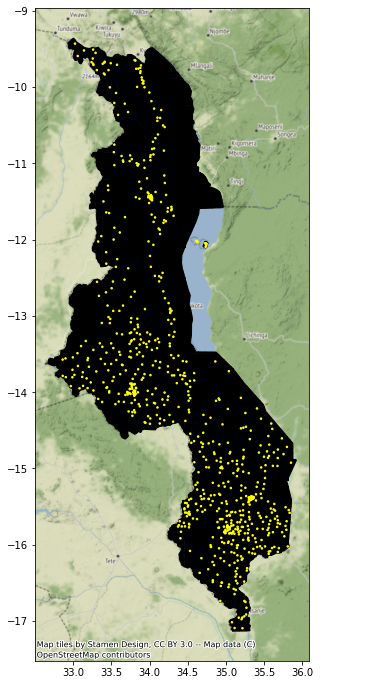

In [7]:
fig, ax = plt.subplots(figsize=(6,12))
for _, r in lsms.iterrows():
    c = plt.Circle((r.cluster_lon,r.cluster_lat), radius=0.01, color='yellow')
    ax.add_artist(c)
gpd.plotting.plot_polygon_collection(ax, df_geo['geometry'], color='black')
ctx.add_basemap(ax, crs=df_geo.crs)

In [8]:
metric = 'phone_density'

In [9]:
preds = pd.read_csv(f'../countries/MWI/results/ridge_{metric}/predictions.csv')

In [10]:
preds

,centroid_lat,centroid_lon,predicted_phone_density_pc
0,-17.090042,35.134795,0.052207
1,-17.089147,35.224623,0.286313
2,-17.088275,35.292842,0.296044
3,-17.078704,35.078662,-0.016993
4,-17.012846,35.070726,0.092379
...,...,...,...
1156,-9.506707,33.153427,0.065422
1157,-9.491028,33.068479,0.087722
1158,-9.476012,32.984559,0.082901
1159,-9.426405,33.048288,0.028083


In [11]:
df_geo['centroid'] = df_geo['geometry'].centroid

In [12]:
df_geo['centroid_lat'] = df_geo['centroid'].apply(lambda point: point.y)
df_geo['centroid_lon'] = df_geo['centroid'].apply(lambda point: point.x)

In [13]:
df_geo.shape, preds.shape

((1447, 7), (1161, 3))

In [14]:
df_geo = merge_on_lat_lon(df_geo, preds, keys=['centroid_lat', 'centroid_lon'], how='left')

In [15]:
df_geo.head()

,GID_0,NAME_0,population,geometry,centroid,centroid_lat,centroid_lon,predicted_phone_density_pc
0,MWI,Malawi,1831.335327,"POLYGON ((32.75442 -13.55145, 32.75442 -13.582...",POINT (32.71530 -13.57152),-13.571520,32.715298,0.108253
1,MWI,Malawi,6417.386719,"POLYGON ((32.67429 -13.58251, 32.75442 -13.582...",POINT (32.71536 -13.61368),-13.613677,32.715360,0.176566
2,MWI,Malawi,309.328827,"POLYGON ((32.84425 -13.45090, 32.84425 -13.495...",POINT (32.84017 -13.47393),-13.473934,32.840170,0.094931
3,MWI,Malawi,4713.566895,"POLYGON ((32.83539 -13.49517, 32.84425 -13.495...",POINT (32.80554 -13.55326),-13.553260,32.805541,0.082312
4,MWI,Malawi,2767.572754,"POLYGON ((32.75442 -13.58251, 32.84425 -13.582...",POINT (32.80153 -13.62361),-13.623613,32.801527,0.186030


In [16]:
to_use = df_geo['population'] >= 5000
df_geo['to_ignore'] = True
df_geo.loc[to_use, 'to_ignore'] = False

In [17]:
df_geo

,GID_0,NAME_0,population,geometry,centroid,centroid_lat,centroid_lon,predicted_phone_density_pc,to_ignore
0,MWI,Malawi,1831.335327,"POLYGON ((32.75442 -13.55145, 32.75442 -13.582...",POINT (32.71530 -13.57152),-13.571520,32.715298,0.108253,True
1,MWI,Malawi,6417.386719,"POLYGON ((32.67429 -13.58251, 32.75442 -13.582...",POINT (32.71536 -13.61368),-13.613677,32.715360,0.176566,False
2,MWI,Malawi,309.328827,"POLYGON ((32.84425 -13.45090, 32.84425 -13.495...",POINT (32.84017 -13.47393),-13.473934,32.840170,0.094931,True
3,MWI,Malawi,4713.566895,"POLYGON ((32.83539 -13.49517, 32.84425 -13.495...",POINT (32.80554 -13.55326),-13.553260,32.805541,0.082312,True
4,MWI,Malawi,2767.572754,"POLYGON ((32.75442 -13.58251, 32.84425 -13.582...",POINT (32.80153 -13.62361),-13.623613,32.801527,0.186030,True
...,...,...,...,...,...,...,...,...,...
1442,MWI,Malawi,10320.574219,"POLYGON ((35.80869 -15.84139, 35.83018 -15.841...",POINT (35.81790 -15.88202),-15.882017,35.817903,0.075135,False
1443,MWI,Malawi,4459.725586,"POLYGON ((35.80869 -15.92779, 35.82366 -15.927...",POINT (35.81558 -15.97780),-15.977795,35.815585,0.278037,True
1444,MWI,Malawi,1659.532715,"POLYGON ((35.80869 -16.01415, 35.82730 -16.014...",POINT (35.81698 -16.02575),-16.025746,35.816981,0.188474,True
1445,MWI,Malawi,45.102989,"POLYGON ((35.92031 -14.88857, 35.89852 -14.888...",POINT (35.90849 -14.88689),-14.886889,35.908495,NaN,True


In [18]:
geometry = df_geo['geometry']

coloring_guide = df_geo[f'predicted_{metric}_pc']
coloring_guide.loc[coloring_guide < 0] = 0
coloring_guide.fillna(-1, inplace=True)
coloring_guide.loc[df_geo['to_ignore']] = -1

cmap = 'inferno'
vmin = coloring_guide.min()
vmax = coloring_guide.max()

kwargs = {'vmin': vmin,
         'vmax': vmax,
         'cmap': cmap}


/Applications/anaconda3/envs/taddle/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
vmax

0.5116988202479283

In [20]:
coloring_guide.max()

0.5116988202479283

/Users/jmathur25/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  if __name__ == '__main__':


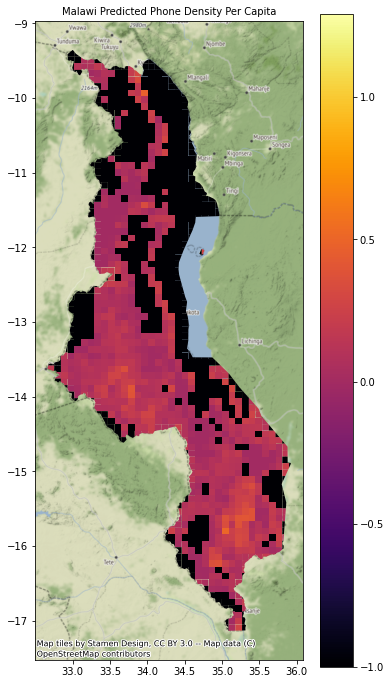

In [21]:
import matplotlib.pyplot as plt
from shapely.geometry.point import Point
import matplotlib.cm as cm
import matplotlib.colors as colors
import contextily as ctx

under_color = 'b'
cmap = cm.get_cmap('inferno')
cmap.set_under(under_color)
vmax = coloring_guide.mean() + 3 * coloring_guide.std()

kwargs = {
    'vmin': vmin,
    'vmax': vmax,
    'cmap': cmap
}

fig, ax = plt.subplots(figsize=(6,12))

ax.set_aspect("equal")
norm = colors.Normalize(vmin, vmax)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
gpd.plotting.plot_polygon_collection(ax, geometry, values=coloring_guide, **kwargs)

units = ''
if metric in ['consumption', 'phone_consumption']:
    units = '($/year)'

label = (metric +' per capita').replace('_', ' ')
ax.set_title(f'Malawi Predicted {label.title() + units}', fontsize=10)
ctx.add_basemap(ax, crs=df_geo.crs)

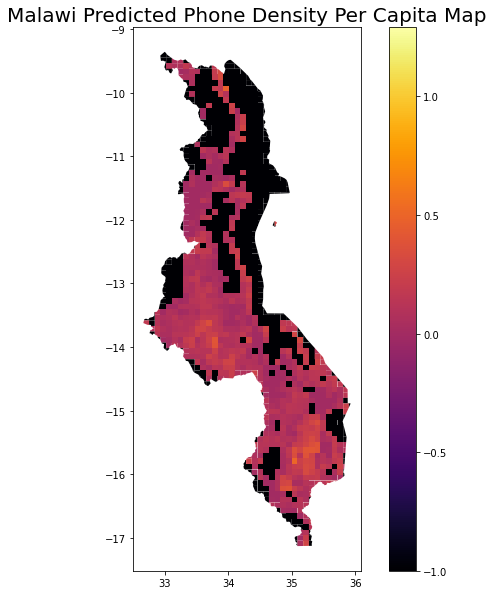

In [23]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect("equal")
norm = colors.Normalize(vmin, vmax)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
gpd.plotting.plot_polygon_collection(ax, geometry, values=coloring_guide, **kwargs)

units = ''
if metric in ['consumption', 'phone_consumption']:
    units = '($/year)'

label = (metric +' per capita').replace('_', ' ')
ax.set_title(f'Malawi Predicted {label.title() + units} Map', fontsize=20)

plt.savefig(f'../countries/MWI/results/figures/predicted_{metric}_per_capita.png')
plt.show()